# CGM Analysis

### Tasks
1. Extract 4 (one for each student) different types of time series features from only the CGM data cell array and CGM timestamp cell array (10 points each) total 40
2.	For each time series explain why you chose such feature (5 points each) total 20
3.	Show values of each of the features and argue that your intuition in step b is validated or disproved? (5 points each ) total 20
4.	Create a feature matrix where each row is a collection of features from each time series. SO if there are 75 time series and your feature length after concatenation of the 4 types of featues is 17 then the feature matrix size will be 75 X 17 (10 points)
5.	Provide this feature matrix to PCA and derive the new feature matrix. Chose the top 5 features and plot them for each time series.  (5 points)
6.	For each feature in the top 5 argue why it is chosen as a top five feature in PCA? (3 points each) total 15


In [170]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

## Read Input file

Make sure the path is correct for you

In [171]:
cgm_timestamps = pd.read_csv("dm_proj1_data/CGMDatenumLunchPat1.csv")
cgm_values = pd.read_csv("dm_proj1_data/CGMSeriesLunchPat1.csv")

### Reference function

In [172]:
def mdate_to_pdate(mdate):
    return (datetime.fromordinal(int(mdate)) + timedelta(days=mdate % 1) - timedelta(days=366)).strftime("%Y-%m-%d %H:%M:%S")

In [173]:
# first and last
print('first',mdate_to_pdate(737225.5842))
print('last',mdate_to_pdate(737225.48))

first 2018-06-14 14:01:14
last 2018-06-14 11:31:11


### Pre-processing

1. Convert Datetimes to useable format
2. Merge Timestamps and Values into one dataframe
3. Rearrange columns w.r.t column names like timeseries#_x and timeseries#_y

In [174]:
#cgm_timestamps.interpolate(method = 'quadratic')

In [175]:
#cgm_timestamps

In [176]:
for col in cgm_timestamps.columns:
    cgm_timestamps[col] = cgm_timestamps[col].apply(lambda x: mdate_to_pdate(x) if pd.notnull(x) else x)

In [177]:
cgm_timestamps, cgm_values = cgm_timestamps.T, cgm_values.T

In [178]:
cgm_timestamps = cgm_timestamps.set_index([pandas.Index(['cgm_{}'.format(i) for i in range(1, len(cgm_timestamps) + 1)])])
cgm_values = cgm_values.set_index([pandas.Index(['cgm_{}'.format(i) for i in range(1, len(cgm_timestamps) + 1)])])

In [179]:
cgm_merged = pandas.merge(cgm_timestamps, cgm_values, how="inner", left_index=True, right_index=True)

In [180]:
cols = cgm_merged.columns.tolist()
new_cols = []
for i in range(len(cgm_merged)):
    new_cols.append(cols[0 + i])
    new_cols.append(cols[len(cgm_merged.columns) // 2 + i])

In [181]:
cgm_merged = cgm_merged[new_cols]
cgm_merged = cgm_merged.fillna(method='ffill', limit=2)

In [184]:
# sort timeseries
for i in cgm_merged.columns:
    cgm_merged[i] = cgm_merged[i].values[::-1]

In [186]:
cgm_merged.to_csv("dm_proj1_data/intermediate_files/cgm_merged_2.csv")

### Plot all Meals w.r.t time in descending order

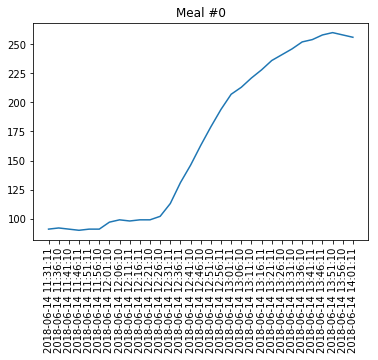

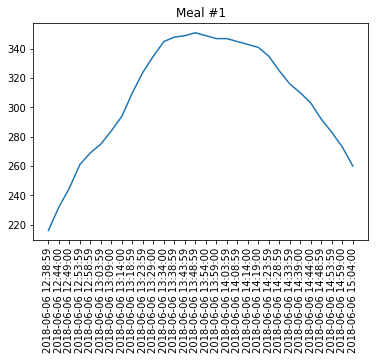

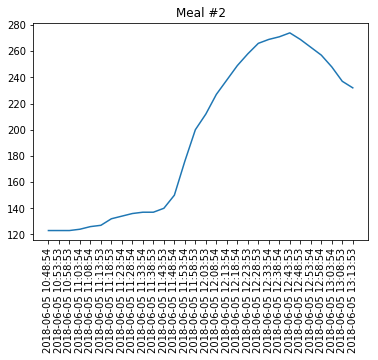

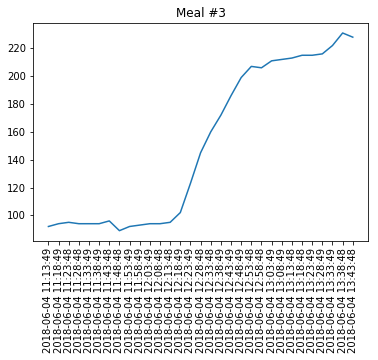

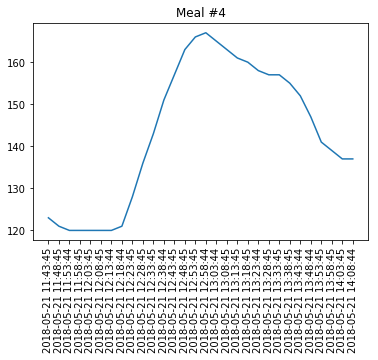

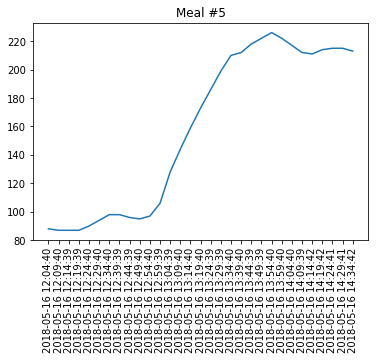

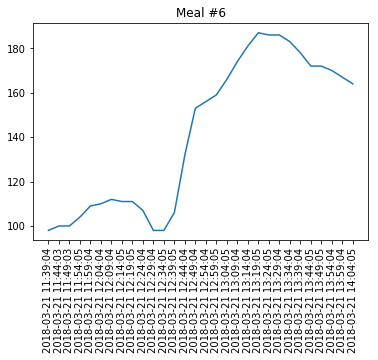

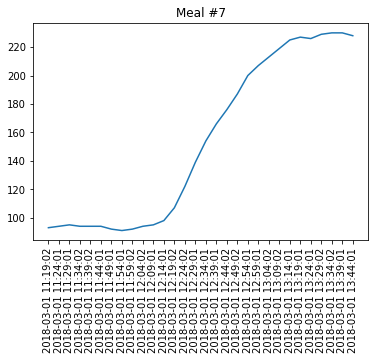

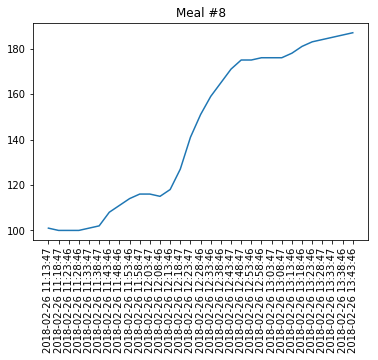

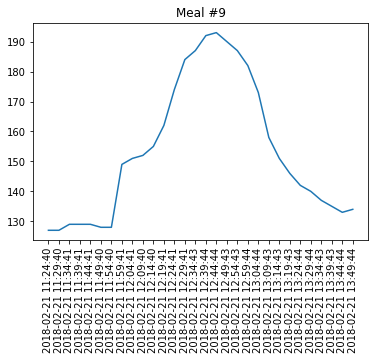

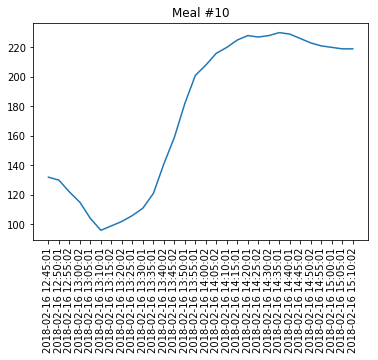

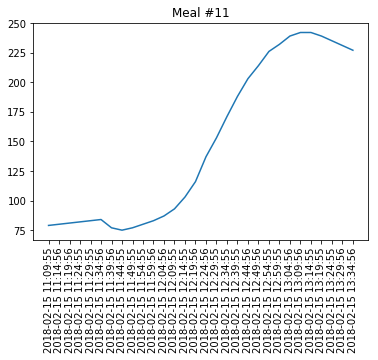

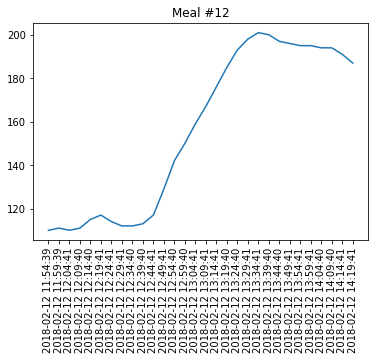

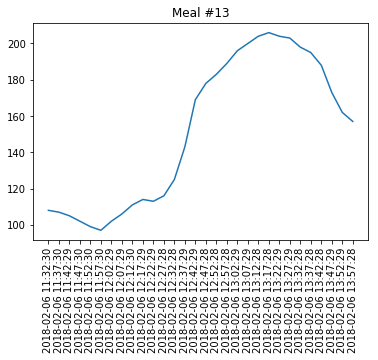

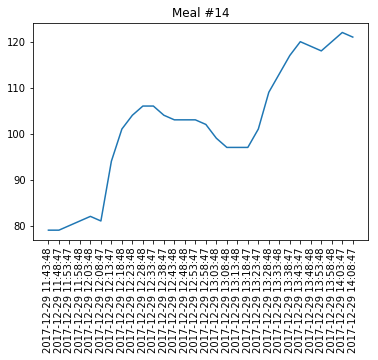

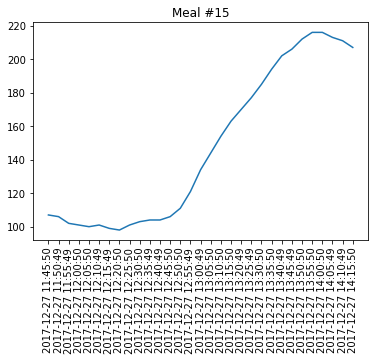

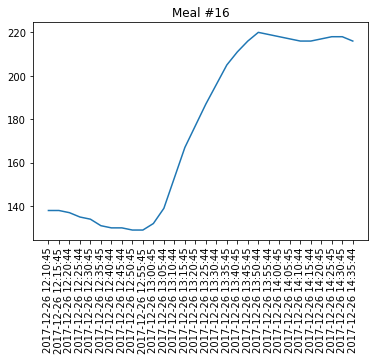

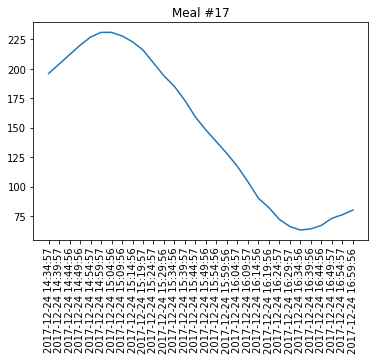

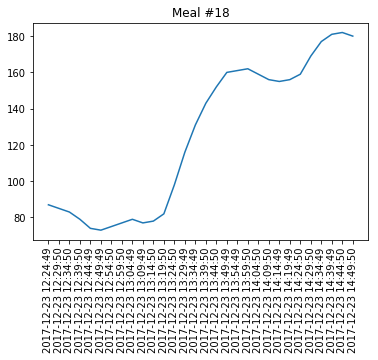

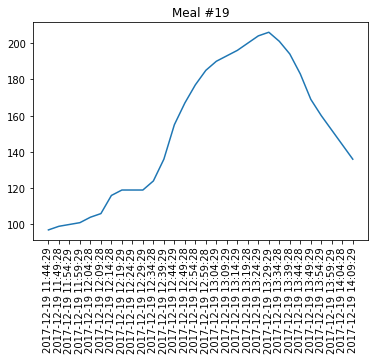

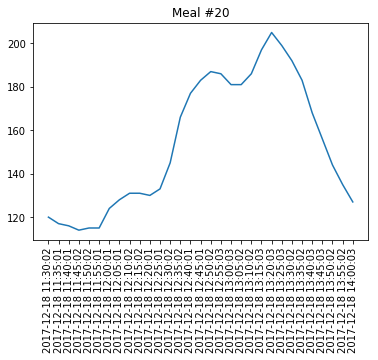

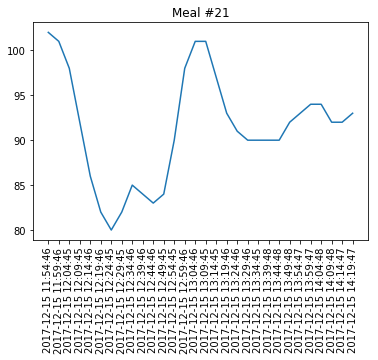

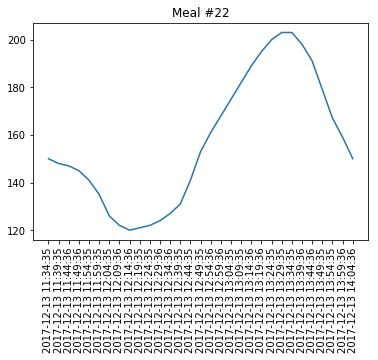

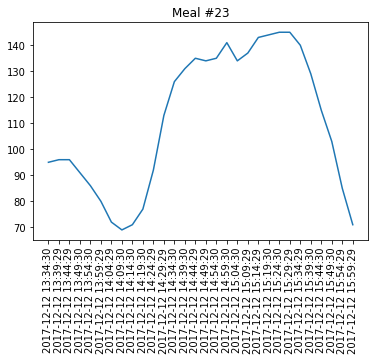

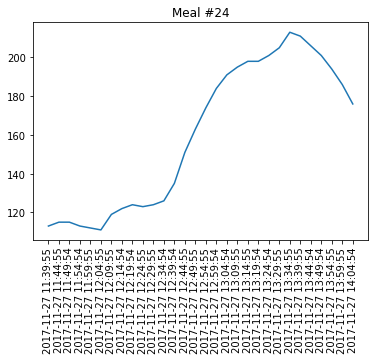

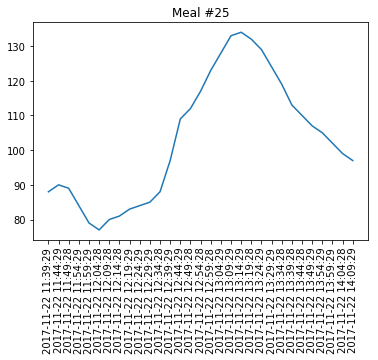

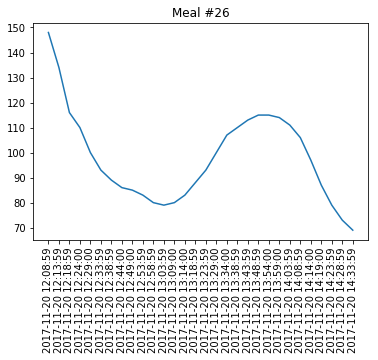

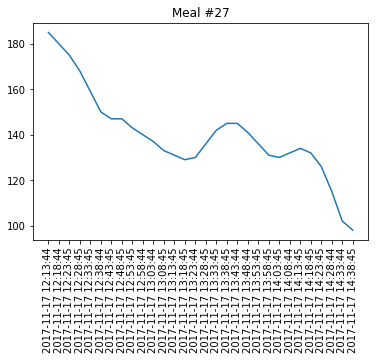

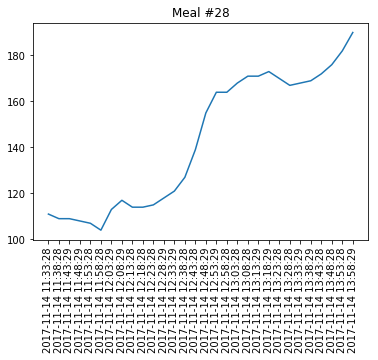

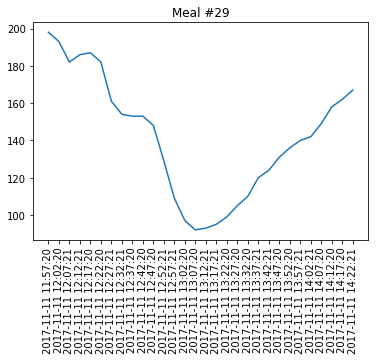

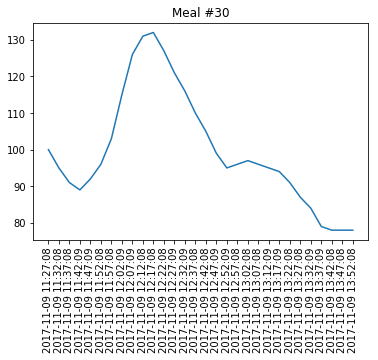

In [187]:
for i in range(len(cgm_merged)):
    x, y = str(i) + "_x", str(i) + "_y"
    plt.plot(cgm_merged[x], cgm_merged[y])
    plt.title("Meal #{}".format(x.split("_")[0]))
    plt.xticks(rotation=90)
    plt.show()

In [188]:
num = 2
for i in range(len(cgm_merged.columns) // 2):
    cgm_merged.insert(num, '{}_out_of_range'.format(i), [70 - j if j < 70 else j - 180 if j > 180 else 0 for j in cgm_merged['{}_y'.format(i)]], True)
    num += 3
cgm_merged

,0_x,0_y,0_out_of_range,1_x,1_y,1_out_of_range,2_x,2_y,2_out_of_range,3_x,...,27_out_of_range,28_x,28_y,28_out_of_range,29_x,29_y,29_out_of_range,30_x,30_y,30_out_of_range
cgm_1,2018-06-14 11:31:11,91.0,0.0,2018-06-06 12:38:59,216.0,36.0,2018-06-05 10:48:54,123.0,0.0,2018-06-04 11:13:49,...,5.0,2017-11-14 11:33:28,111.0,0.0,2017-11-11 11:57:20,198.0,18.0,2017-11-09 11:27:08,100.0,0
cgm_2,2018-06-14 11:36:10,92.0,0.0,2018-06-06 12:38:59,216.0,36.0,2018-06-05 10:48:54,123.0,0.0,2018-06-04 11:18:49,...,5.0,2017-11-14 11:33:28,111.0,0.0,2017-11-11 11:57:20,198.0,18.0,2017-11-09 11:27:08,100.0,0
cgm_3,2018-06-14 11:41:10,91.0,0.0,2018-06-06 12:44:00,232.0,52.0,2018-06-05 10:53:53,123.0,0.0,2018-06-04 11:23:48,...,0.0,2017-11-14 11:38:28,109.0,0.0,2017-11-11 12:02:20,193.0,13.0,2017-11-09 11:32:08,95.0,0
cgm_4,2018-06-14 11:46:11,90.0,0.0,2018-06-06 12:49:00,245.0,65.0,2018-06-05 10:58:53,123.0,0.0,2018-06-04 11:28:48,...,0.0,2017-11-14 11:43:29,109.0,0.0,2017-11-11 12:07:21,182.0,2.0,2017-11-09 11:37:08,91.0,0
cgm_5,2018-06-14 11:51:11,91.0,0.0,2018-06-06 12:53:59,261.0,81.0,2018-06-05 11:03:54,124.0,0.0,2018-06-04 11:33:49,...,0.0,2017-11-14 11:48:29,108.0,0.0,2017-11-11 12:12:21,186.0,6.0,2017-11-09 11:42:09,89.0,0
cgm_6,2018-06-14 11:56:10,91.0,0.0,2018-06-06 12:58:59,269.0,89.0,2018-06-05 11:08:54,126.0,0.0,2018-06-04 11:38:49,...,0.0,2017-11-14 11:53:28,107.0,0.0,2017-11-11 12:17:20,187.0,7.0,2017-11-09 11:47:09,92.0,0
cgm_7,2018-06-14 12:01:10,97.0,0.0,2018-06-06 13:03:59,275.0,95.0,2018-06-05 11:13:53,127.0,0.0,2018-06-04 11:43:48,...,0.0,2017-11-14 11:58:28,104.0,0.0,2017-11-11 12:22:20,182.0,2.0,2017-11-09 11:52:08,96.0,0
cgm_8,2018-06-14 12:06:10,99.0,0.0,2018-06-06 13:09:00,284.0,104.0,2018-06-05 11:18:53,132.0,0.0,2018-06-04 11:48:48,...,0.0,2017-11-14 12:03:29,113.0,0.0,2017-11-11 12:27:21,161.0,0.0,2017-11-09 11:57:08,103.0,0
cgm_9,2018-06-14 12:11:11,98.0,0.0,2018-06-06 13:14:00,294.0,114.0,2018-06-05 11:23:54,134.0,0.0,2018-06-04 11:53:49,...,0.0,2017-11-14 12:08:29,117.0,0.0,2017-11-11 12:32:21,154.0,0.0,2017-11-09 12:02:09,115.0,0
cgm_10,2018-06-14 12:16:11,99.0,0.0,2018-06-06 13:18:59,310.0,130.0,2018-06-05 11:28:54,136.0,0.0,2018-06-04 11:58:49,...,0.0,2017-11-14 12:13:28,114.0,0.0,2017-11-11 12:37:20,153.0,0.0,2017-11-09 12:07:09,126.0,0


In [134]:
# i = 0
# while True:
#     del cgm_merged['{}_out_of_range'.format(i)]
#     i += 1

In [189]:
posCount, negCount = 0, 0
outOfRange = []
for i in range(len(cgm_merged.columns) // 3):
    for j in cgm_merged['{}_out_of_range'.format(i)]:
        if j > 0:
            posCount += 1
        if j < 0:
            negCount += 1
#     outOfRange.append([posCount,negCount])
    outOfRange.append(posCount)
    posCount, negCount = 0, 0

In [190]:
timeRange = ['{1} - {0}'.format(cgm_merged['{}_x'.format(i)][0], cgm_merged['{}_x'.format(i)][-1]) for i in range(len(cgm_merged.columns)//3)]

In [191]:
pd.DataFrame({'timeRange':timeRange, 'outOfRange': outOfRange})

,timeRange,outOfRange
0,2018-06-14 14:01:11 - 2018-06-14 11:31:11,14
1,2018-06-06 15:04:00 - 2018-06-06 12:38:59,31
2,2018-06-05 13:13:53 - 2018-06-05 10:48:54,16
3,2018-06-04 13:43:48 - 2018-06-04 11:13:49,13
4,2018-05-21 14:08:44 - 2018-05-21 11:43:45,0
5,2018-05-16 14:34:42 - 2018-05-16 12:04:40,15
6,2018-03-21 14:04:05 - 2018-03-21 11:39:04,5
7,2018-03-01 13:44:01 - 2018-03-01 11:19:02,12
8,2018-02-26 13:43:46 - 2018-02-26 11:13:47,6
9,2018-02-21 13:49:44 - 2018-02-21 11:24:40,7
